In [0]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from textblob import TextBlob
from nltk.corpus import stopwords


#print(stopwords.words('english'))


warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [0]:
train  = pd.read_csv('Tweets2.csv')

In [74]:
train.head(5)

,Unnamed: 0,Date,Text,User
0,0,2020-06-12 10:43:32,"RT @NaseerGiyas: Doctors, nurses, police offic...",FareehaM
1,1,2020-06-12 10:41:35,Becoz of this fallacious thinking(mismanagemen...,mizozeitgeist
2,2,2020-06-12 10:40:41,TS Police Not Taking Serious Action Against Th...,mursalinahme
3,3,2020-06-12 10:40:40,According to our Research on Covid-19 In Telan...,mursalinahme
4,4,2020-06-12 10:40:03,I don't even know what to say anymore. \n\n#Te...,HariniPrasad13


In [0]:
combi=train
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [0]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['Text'], "@[\w]*")

In [77]:
combi.head(5)

,Unnamed: 0,Date,Text,User,tidy_tweet
0,0,2020-06-12 10:43:32,"RT @NaseerGiyas: Doctors, nurses, police offic...",FareehaM,"RT : Doctors, nurses, police officials and med..."
1,1,2020-06-12 10:41:35,Becoz of this fallacious thinking(mismanagemen...,mizozeitgeist,Becoz of this fallacious thinking(mismanagemen...
2,2,2020-06-12 10:40:41,TS Police Not Taking Serious Action Against Th...,mursalinahme,TS Police Not Taking Serious Action Against Th...
3,3,2020-06-12 10:40:40,According to our Research on Covid-19 In Telan...,mursalinahme,According to our Research on Covid-19 In Telan...
4,4,2020-06-12 10:40:03,I don't even know what to say anymore. \n\n#Te...,HariniPrasad13,I don't even know what to say anymore. \n\n#Te...


In [0]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [79]:
combi.head(5)

,Unnamed: 0,Date,Text,User,tidy_tweet
0,0,2020-06-12 10:43:32,"RT @NaseerGiyas: Doctors, nurses, police offic...",FareehaM,Doctors nurses police officials media persons ...
1,1,2020-06-12 10:41:35,Becoz of this fallacious thinking(mismanagemen...,mizozeitgeist,Becoz this fallacious thinking mismanagement S...
2,2,2020-06-12 10:40:41,TS Police Not Taking Serious Action Against Th...,mursalinahme,Police Taking Serious Action Against Breakers ...
3,3,2020-06-12 10:40:40,According to our Research on Covid-19 In Telan...,mursalinahme,According Research Covid Telangana Telangana N...
4,4,2020-06-12 10:40:03,I don't even know what to say anymore. \n\n#Te...,HariniPrasad13,even know what anymore #Telangana dies road am...


In [80]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Doctors, nurses, police, officials, media, pe...
1    [Becoz, this, fallacious, thinking, mismanagem...
2    [Police, Taking, Serious, Action, Against, Bre...
3    [According, Research, Covid, Telangana, Telang...
4    [even, know, what, anymore, #Telangana, dies, ...
Name: tidy_tweet, dtype: object

In [0]:
# from nltk.stem.porter import *
# stemmer = PorterStemmer()

# tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
# tokenized_tweet.head()

# for i in range(len(tokenized_tweet)):
#     tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

# combi['tidy_tweet'] = tokenized_tweet

In [0]:
pol=[]
for i in range(len(combi['tidy_tweet'])):
      blob = TextBlob(combi['tidy_tweet'][i])
      Sentiment = blob.sentiment    
      polarity = Sentiment.polarity
      subjectivity = Sentiment.subjectivity
      pol.append(polarity)

In [83]:
combi['label']=pol
combi.head()

,Unnamed: 0,Date,Text,User,tidy_tweet,label
0,0,2020-06-12 10:43:32,"RT @NaseerGiyas: Doctors, nurses, police offic...",FareehaM,Doctors nurses police officials media persons ...,-0.500000
1,1,2020-06-12 10:41:35,Becoz of this fallacious thinking(mismanagemen...,mizozeitgeist,Becoz this fallacious thinking mismanagement S...,-0.200000
2,2,2020-06-12 10:40:41,TS Police Not Taking Serious Action Against Th...,mursalinahme,Police Taking Serious Action Against Breakers ...,-0.022222
3,3,2020-06-12 10:40:40,According to our Research on Covid-19 In Telan...,mursalinahme,According Research Covid Telangana Telangana N...,0.000000
4,4,2020-06-12 10:40:03,I don't even know what to say anymore. \n\n#Te...,HariniPrasad13,even know what anymore #Telangana dies road am...,0.000000


In [84]:
#stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words2= ['https','covid']

for i in range(len(combi['tidy_tweet'])):
    combi['tidy_tweet'][i]= combi['tidy_tweet'][i].lower()
    query= combi['tidy_tweet'][i]
    querywords = query.split()
    #querywords  = [word for word in querywords if word.lower() not in stop_words]
    resultwords  = [word for word in querywords if word.lower() not in stop_words2]
    result = ' '.join(resultwords)
    combi['tidy_tweet'][i]= result
    

combi.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,Date,Text,User,tidy_tweet,label
0,0,2020-06-12 10:43:32,"RT @NaseerGiyas: Doctors, nurses, police offic...",FareehaM,doctors nurses police officials media persons ...,-0.500000
1,1,2020-06-12 10:41:35,Becoz of this fallacious thinking(mismanagemen...,mizozeitgeist,becoz this fallacious thinking mismanagement s...,-0.200000
2,2,2020-06-12 10:40:41,TS Police Not Taking Serious Action Against Th...,mursalinahme,police taking serious action against breakers ...,-0.022222
3,3,2020-06-12 10:40:40,According to our Research on Covid-19 In Telan...,mursalinahme,according research telangana telangana needs m...,0.000000
4,4,2020-06-12 10:40:03,I don't even know what to say anymore. \n\n#Te...,HariniPrasad13,even know what anymore #telangana dies road am...,0.000000


All Wordcloud

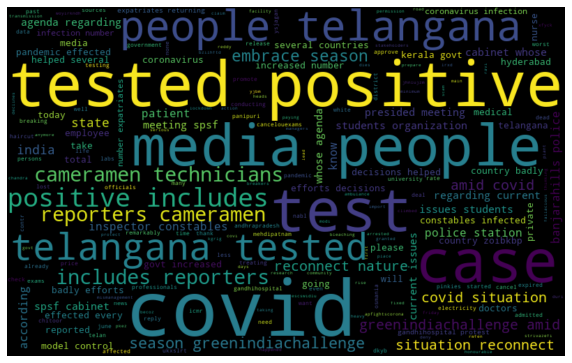

In [85]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Negative Wordcloud

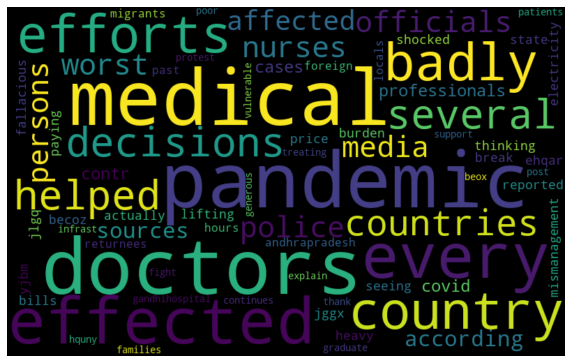

In [86]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] < -0.1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from non racist/sexist tweets


HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] >= 0.1])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] < -0.1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

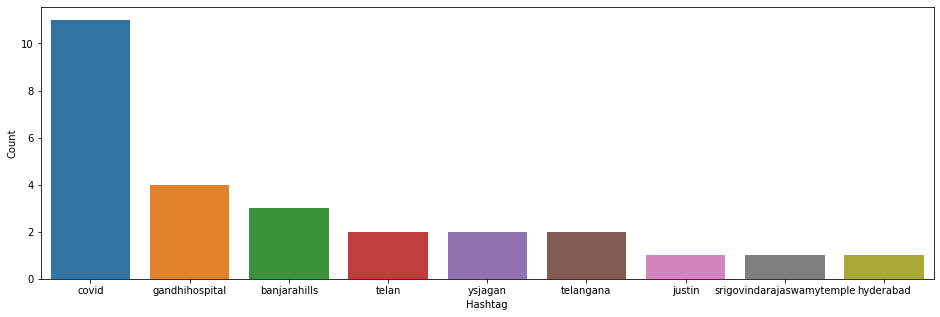

In [89]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

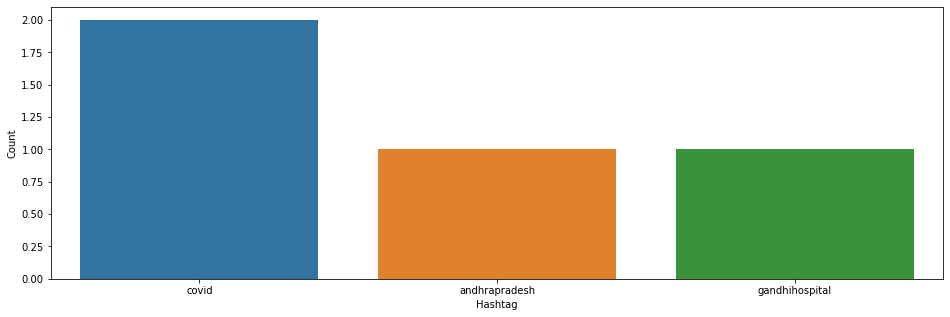

In [90]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

for i in range(len(combi['tidy_tweet'])):
  if train['label'][i] >= 0:
        train['label'][i] =1
  else:
        train['label'][i] =0



xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf, train['label'], random_state=42, test_size=0.3)



lreg = LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)
accuracy_score(yvalid, prediction_int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.8666666666666667

In [93]:
print(f1_score(yvalid, prediction_int))
print(accuracy_score(yvalid, prediction_int))

0.9285714285714286
0.8666666666666667
